In [1]:
# Importación de librerias
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas

# Código

In [2]:
# Obtencion de datos del covid
data = pandas.read_csv("/home/jacl/Downloads/owid-covid-data.csv")
data = data[data.iso_code == 'GTM']
data = data.filter(items=['total_cases'])
data.dropna(inplace=True)
x = [*range(0,data.size,1)]
x = np.asarray(x)[:,np.newaxis]
y = np.asarray(data['total_cases'])[:,np.newaxis]

## Regresión lineal
Se utilizo grado **6**, ya que se muestra menor error en el RMSE

In [3]:
poly_degree = 6
polynomial_features = PolynomialFeatures(degree = poly_degree)
x_transform = polynomial_features.fit_transform(x)

## Creación del modelo

In [4]:
model = LinearRegression().fit(x_transform, y)
y_new = model.predict(x_transform)

## Calculo de estadisticas de correlación

In [5]:
rmse = np.sqrt(mean_squared_error(y, y_new))
r2 = r2_score(y, y_new)
print('RMSE: ', rmse)
print('R2: ', r2)

RMSE:  8362.979990661532
R2:  0.9982563396904355


## Predicción al final del mes de enero
Ya que el ultimo dato de la información obtenida era del 26 de diciembre y se contaba con 653 datos, los calculos para finales de enero seria hasta el 689, ya que con los 5 dias restantes del año y los 31 dias del mes de enero alcanzariamos esa edad

In [6]:
x_new_min = 654.0
x_new_max = 689.0

x_new = np.linspace(x_new_min, x_new_max, 50)
x_new = x_new[:,np.newaxis]

x_new_transform = polynomial_features.fit_transform(x_new)
y_new = model.predict(x_new_transform)

# Gráfica

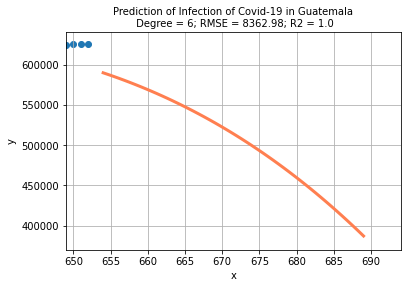

In [7]:
plt.scatter(x,y)
plt.plot(x_new, y_new, color='coral', linewidth=3)
plt.grid()
plt.xlim(x_new_min - 5,x_new_max + 5)
plt.ylim(370000,640000)
title = 'Degree = {}; RMSE = {}; R2 = {}'.format(poly_degree, round(rmse,2), round(r2,2))
plt.title("Prediction of Infection of Covid-19 in Guatemala\n " + title, fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()